<a href="https://colab.research.google.com/github/ahd-rafi/Machine-Learning-Projects/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Logistic Regression**






Jovian Link: https://jovian.ai/aakashns/python-sklearn-logistic-regression

In [1]:
!pip install opendatasets --upgrade --quiet


In [2]:
import opendatasets as od

od.version()

'0.1.22'

In [3]:
dataset_url = "https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package"


In [4]:
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ahmadrafi004
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package


100%|██████████| 3.83M/3.83M [00:00<00:00, 139MB/s]

In [5]:
import os

In [6]:
data_dir =  "./weather-dataset-rattle-package"

In [7]:
os.listdir(data_dir)

['weatherAUS.csv']

In [8]:
train_csv = data_dir + "/weatherAUS.csv"

In [9]:
train_csv

'./weather-dataset-rattle-package/weatherAUS.csv'

In [10]:
import pandas as pd

In [11]:
raw_df = pd.read_csv(train_csv)

In [12]:
raw_df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W           44.0          W  ...        71.0   
1            NaN         WNW           44.0        NNW  ...        44.0   
2            NaN         WSW           46.0          W  ...        38.0   
3            NaN          NE           24.0         SE  ...        45.0   
4            NaN           W           41.0        ENE  ...        82.0   
...          ...         ...            ...        ...  ...         ...   
145455       NaN           E           31.0         SE  ...        51.0   
145456       NaN         NNW           22.0         SE  ...        56.0   
145457       NaN           N           37.0         SE  ...        53.0   
145458       NaN          SE           28.0        SSE  ...        51.0   
145459       NaN         NaN            NaN        ESE  ...        62.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0              22.0       1007.7       1007.1       8.0       NaN     16.9   
1              25.0       1010.6       1007.8       NaN       NaN     17.2   
2              30.0       1007.6       1008.7       NaN       2.0     21.0   
3              16.0       1017.6       1012.8       NaN       NaN     18.1   
4              33.0       1010.8       1006.0       7.0       8.0     17.8   
...             ...          ...          ...       ...       ...      ...   
145455         24.0       1024.6       1020.3       NaN       NaN     10.1   
145456         21.0       1023.5       1019.1       NaN       NaN     10.9   
145457         24.0       1021.0       1016.8       NaN       NaN     12.5   
145458         24.0       1019.4       1016.5       3.0       2.0     15.1   
145459         36.0       1020.2       1017.9       8.0       8.0     15.0   

        Temp3pm  RainToday  RainTomorrow  
0          21.8         No            No  
1          24.3         No            No  
2          23.2         No            No  
3          26.5         No            No  
4          29.7         No            No  
...         ...        ...           ...  
145455     22.4         No            No  
145456     24.5         No            No  
145457     26.1         No            No  
145458     26.0         No            No  
145459     20.9         No           NaN  

[145460 rows x 23 columns]

In [13]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [14]:
raw_df.dropna(subset = ['RainToday', 'RainTomorrow'], inplace = True)

In [15]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140787 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           140787 non-null  object 
 1   Location       140787 non-null  object 
 2   MinTemp        140319 non-null  float64
 3   MaxTemp        140480 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81093 non-null   float64
 6   Sunshine       73982 non-null   float64
 7   WindGustDir    131624 non-null  object 
 8   WindGustSpeed  131682 non-null  float64
 9   WindDir9am     131127 non-null  object 
 10  WindDir3pm     137117 non-null  object 
 11  WindSpeed9am   139732 non-null  float64
 12  WindSpeed3pm   138256 non-null  float64
 13  Humidity9am    139270 non-null  float64
 14  Humidity3pm    137286 non-null  float64
 15  Pressure9am    127044 non-null  float64
 16  Pressure3pm    127018 non-null  float64
 17  Cloud9am       88162 non-null   fl

**EDV AND VISULIZATION**

In [16]:
!pip install matplotlib plotly seaborn --quiet --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.0/19.0 MB 32.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 17.2 MB/s eta 0:00:00


In [17]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
raw_df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [18]:
raw_df.nunique()

Date             3436
Location           49
MinTemp           389
MaxTemp           503
Rainfall          679
Evaporation       355
Sunshine          145
WindGustDir        16
WindGustSpeed      67
WindDir9am         16
WindDir3pm         16
WindSpeed9am       43
WindSpeed3pm       44
Humidity9am       101
Humidity3pm       101
Pressure9am       545
Pressure3pm       548
Cloud9am           10
Cloud3pm           10
Temp9am           440
Temp3pm           500
RainToday           2
RainTomorrow        2
dtype: int64

In [19]:
raw_df.Location.nunique()

49

In [20]:
px.histogram(raw_df, x = 'Location', color = 'RainToday', title = 'location vs Rain today')

In [21]:
px.histogram(raw_df, x = 'Temp3pm', color = 'RainTomorrow', title = 'Temp3pm vs Raintomorrow')

In [22]:
px.histogram(raw_df, x = 'RainTomorrow', color = 'RainToday', title = 'Raintomorrow vs raintoday')

In [23]:
px.scatter(raw_df.sample(2000),
           x = 'MinTemp',
           y = 'MaxTemp',
           title = 'MinTemp vs MaxTemp',
           color = 'RainToday')

In [24]:
px.strip(raw_df.sample(2000),
         x = 'Temp3pm',
         y = 'Humidity3pm',
         color = 'RainTomorrow',
         title = 'Temp3pm vs humidity 3pm')

In [25]:
raw_df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [26]:
use_sample = False

In [27]:
sample_fraction = 0.1

In [28]:
if use_sample:
  raw_df = raw_df.sample(frac=sample_fraction).copy()

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
train_val_df, test_df = train_test_split(raw_df, test_size = 0.2, random_state = 42)
train_df, val_df = train_test_split(train_val_df, test_size = 0.25, random_state = 42)

In [31]:
print('train df shape: ', train_df.shape)
print('val df shape: ', val_df.shape)
print('test df shape: ', test_df.shape)

train df shape:  (84471, 23)
val df shape:  (28158, 23)
test df shape:  (28158, 23)


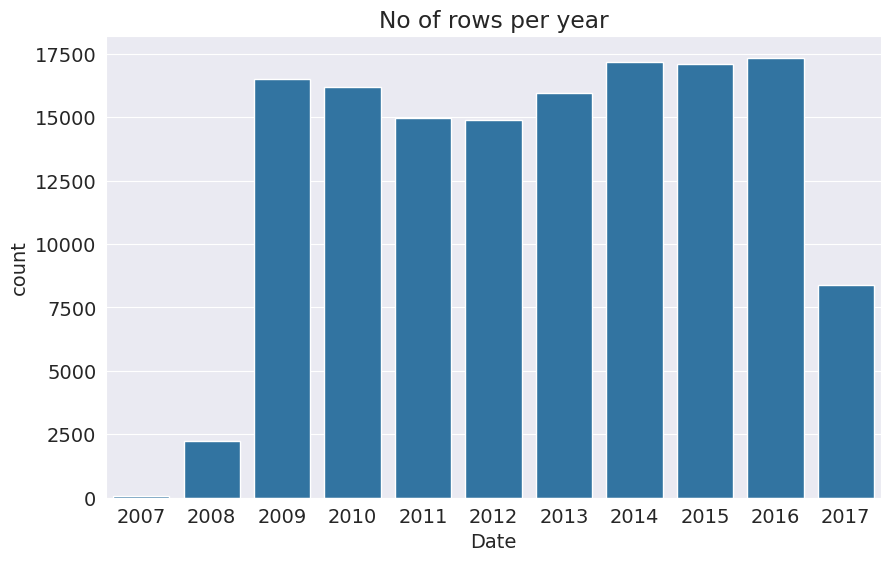

In [32]:
plt.title('No of rows per year')
sns.countplot(x = pd.to_datetime(raw_df.Date).dt.year);

In [33]:
year = pd.to_datetime(raw_df.Date).dt.year

train_df = raw_df[year < 2015]
val_df = raw_df[year == 2015]
test_df = raw_df[year > 2015]

In [34]:
print('train_df shape: ', train_df.shape)
print('val_df shape: ', val_df.shape)
print('test_df shape: ', test_df.shape)


train_df shape:  (97988, 23)
val_df shape:  (17089, 23)
test_df shape:  (25710, 23)


In [35]:
train_df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
144548  2014-12-27    Uluru     16.9     33.2       0.0          NaN   
144549  2014-12-28    Uluru     15.1     36.8       0.0          NaN   
144550  2014-12-29    Uluru     17.3     37.8       0.0          NaN   
144551  2014-12-30    Uluru     20.1     38.5       0.0          NaN   
144552  2014-12-31    Uluru     22.5     39.6       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W           44.0          W  ...        71.0   
1            NaN         WNW           44.0        NNW  ...        44.0   
2            NaN         WSW           46.0          W  ...        38.0   
3            NaN          NE           24.0         SE  ...        45.0   
4            NaN           W           41.0        ENE  ...        82.0   
...          ...         ...            ...        ...  ...         ...   
144548       NaN         SSE           43.0        ESE  ...        22.0   
144549       NaN          NE           31.0        ENE  ...        16.0   
144550       NaN         ESE           39.0        ESE  ...        15.0   
144551       NaN         ESE           43.0        ESE  ...        22.0   
144552       NaN         WNW           76.0        ENE  ...        16.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0              22.0       1007.7       1007.1       8.0       NaN     16.9   
1              25.0       1010.6       1007.8       NaN       NaN     17.2   
2              30.0       1007.6       1008.7       NaN       2.0     21.0   
3              16.0       1017.6       1012.8       NaN       NaN     18.1   
4              33.0       1010.8       1006.0       7.0       8.0     17.8   
...             ...          ...          ...       ...       ...      ...   
144548         13.0       1014.1       1009.8       NaN       NaN     23.7   
144549          8.0       1012.6       1007.6       NaN       NaN     28.9   
144550          8.0       1011.9       1008.0       NaN       NaN     29.7   
144551          9.0       1014.0       1009.2       NaN       NaN     29.8   
144552          9.0       1012.1       1006.2       NaN       NaN     30.1   

        Temp3pm  RainToday  RainTomorrow  
0          21.8         No            No  
1          24.3         No            No  
2          23.2         No            No  
3          26.5         No            No  
4          29.7         No            No  
...         ...        ...           ...  
144548     31.8         No            No  
144549     34.8         No            No  
144550     35.7         No            No  
144551     37.2         No            No  
144552     37.4         No            No  

[97988 rows x 23 columns]

In [36]:
val_df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
2133    2015-01-01   Albury     11.4     33.5       0.0          NaN   
2134    2015-01-02   Albury     15.5     39.6       0.0          NaN   
2135    2015-01-03   Albury     17.1     38.3       0.0          NaN   
2136    2015-01-04   Albury     26.0     33.1       0.0          NaN   
2137    2015-01-05   Albury     19.0     35.2       0.0          NaN   
...            ...      ...      ...      ...       ...          ...   
144913  2015-12-27    Uluru     20.5     34.7       0.0          NaN   
144914  2015-12-28    Uluru     18.0     36.4       0.0          NaN   
144915  2015-12-29    Uluru     17.5     37.1       0.0          NaN   
144916  2015-12-30    Uluru     20.0     38.9       0.0          NaN   
144917  2015-12-31    Uluru     19.3     37.4       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
2133         NaN         WSW           30.0        ESE  ...        45.0   
2134         NaN          NE           56.0        ESE  ...        45.0   
2135         NaN         NNE           48.0         NE  ...        35.0   
2136         NaN         NNE           41.0        ESE  ...        46.0   
2137         NaN           E           33.0        SSE  ...        60.0   
...          ...         ...            ...        ...  ...         ...   
144913       NaN           E           52.0        ESE  ...        23.0   
144914       NaN         ESE           54.0          E  ...        17.0   
144915       NaN           E           56.0          E  ...        12.0   
144916       NaN           E           59.0          E  ...        12.0   
144917       NaN          SE           56.0        ESE  ...        46.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
2133           14.0       1013.5       1011.0       NaN       NaN     21.0   
2134           12.0       1016.0       1012.4       NaN       NaN     25.6   
2135           19.0       1017.9       1012.3       NaN       NaN     29.2   
2136           37.0       1013.6       1012.1       8.0       5.0     27.4   
2137           34.0       1017.4       1014.7       8.0       NaN     25.6   
...             ...          ...          ...       ...       ...      ...   
144913         12.0       1013.2       1010.1       NaN       NaN     24.3   
144914          7.0       1014.7       1010.9       NaN       NaN     26.7   
144915          7.0       1012.6       1007.5       NaN       NaN     28.1   
144916         12.0       1007.2       1002.6       NaN       1.0     31.3   
144917         18.0       1007.3       1003.7       NaN       NaN     25.8   

        Temp3pm  RainToday  RainTomorrow  
2133       32.7         No            No  
2134       38.2         No            No  
2135       37.0         No            No  
2136       30.9         No            No  
2137       32.5         No            No  
...         ...        ...           ...  
144913     33.0         No            No  
144914     35.0         No            No  
144915     34.7         No            No  
144916     38.4         No            No  
144917     35.8         No            No  

[17089 rows x 23 columns]

In [37]:
test_df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
2498    2016-01-01   Albury     20.4     37.6       0.0          NaN   
2499    2016-01-02   Albury     20.9     33.6       0.4          NaN   
2500    2016-01-03   Albury     18.4     23.1       2.2          NaN   
2501    2016-01-04   Albury     17.3     23.7      15.6          NaN   
2502    2016-01-05   Albury     15.5     22.9       6.8          NaN   
...            ...      ...      ...      ...       ...          ...   
145454  2017-06-20    Uluru      3.5     21.8       0.0          NaN   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
2498         NaN         ENE           54.0        NaN  ...        46.0   
2499         NaN         SSE           50.0        SSE  ...        54.0   
2500         NaN         ENE           48.0        ESE  ...        62.0   
2501         NaN         SSE           39.0         SE  ...        74.0   
2502         NaN         ENE           31.0         SE  ...        92.0   
...          ...         ...            ...        ...  ...         ...   
145454       NaN           E           31.0        ESE  ...        59.0   
145455       NaN           E           31.0         SE  ...        51.0   
145456       NaN         NNW           22.0         SE  ...        56.0   
145457       NaN           N           37.0         SE  ...        53.0   
145458       NaN          SE           28.0        SSE  ...        51.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
2498           17.0       1013.4       1009.2       7.0       3.0     26.1   
2499           30.0       1011.1       1008.4       8.0       8.0     24.8   
2500           67.0       1014.0       1014.8       8.0       8.0     21.8   
2501           65.0       1017.9       1016.5       8.0       8.0     19.2   
2502           63.0       1016.3       1013.9       8.0       8.0     17.2   
...             ...          ...          ...       ...       ...      ...   
145454         27.0       1024.7       1021.2       NaN       NaN      9.4   
145455         24.0       1024.6       1020.3       NaN       NaN     10.1   
145456         21.0       1023.5       1019.1       NaN       NaN     10.9   
145457         24.0       1021.0       1016.8       NaN       NaN     12.5   
145458         24.0       1019.4       1016.5       3.0       2.0     15.1   

        Temp3pm  RainToday  RainTomorrow  
2498       36.7         No            No  
2499       31.7         No           Yes  
2500       19.5        Yes           Yes  
2501       21.6        Yes           Yes  
2502       22.2        Yes            No  
...         ...        ...           ...  
145454     20.9         No            No  
145455     22.4         No            No  
145456     24.5         No            No  
145457     26.1         No            No  
145458     26.0         No            No  

[25710 rows x 23 columns]

In [38]:
input_cols = list(train_df.columns)[1:-1]
target_col = 'RainTomorrow'

In [39]:
print(input_cols)

['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']


In [40]:
print(target_col)

RainTomorrow


In [41]:
train_inputs = train_df[input_cols].copy()
train_target = train_df[target_col].copy()

In [42]:
val_inputs = val_df[input_cols].copy()
val_target = val_df[target_col].copy()

In [43]:
test_inputs = test_df[input_cols].copy()
test_target = test_df[target_col].copy()

In [44]:
train_inputs

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0        Albury     13.4     22.9       0.6          NaN       NaN   
1        Albury      7.4     25.1       0.0          NaN       NaN   
2        Albury     12.9     25.7       0.0          NaN       NaN   
3        Albury      9.2     28.0       0.0          NaN       NaN   
4        Albury     17.5     32.3       1.0          NaN       NaN   
...         ...      ...      ...       ...          ...       ...   
144548    Uluru     16.9     33.2       0.0          NaN       NaN   
144549    Uluru     15.1     36.8       0.0          NaN       NaN   
144550    Uluru     17.3     37.8       0.0          NaN       NaN   
144551    Uluru     20.1     38.5       0.0          NaN       NaN   
144552    Uluru     22.5     39.6       0.0          NaN       NaN   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  WindSpeed3pm  \
0                W           44.0          W        WNW  ...          24.0   
1              WNW           44.0        NNW        WSW  ...          22.0   
2              WSW           46.0          W        WSW  ...          26.0   
3               NE           24.0         SE          E  ...           9.0   
4                W           41.0        ENE         NW  ...          20.0   
...            ...            ...        ...        ...  ...           ...   
144548         SSE           43.0        ESE        SSE  ...          26.0   
144549          NE           31.0        ENE         SW  ...          20.0   
144550         ESE           39.0        ESE        SSE  ...           9.0   
144551         ESE           43.0        ESE        SSW  ...          17.0   
144552         WNW           76.0        ENE        SSW  ...          13.0   

        Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0              71.0         22.0       1007.7       1007.1       8.0   
1              44.0         25.0       1010.6       1007.8       NaN   
2              38.0         30.0       1007.6       1008.7       NaN   
3              45.0         16.0       1017.6       1012.8       NaN   
4              82.0         33.0       1010.8       1006.0       7.0   
...             ...          ...          ...          ...       ...   
144548         22.0         13.0       1014.1       1009.8       NaN   
144549         16.0          8.0       1012.6       1007.6       NaN   
144550         15.0          8.0       1011.9       1008.0       NaN   
144551         22.0          9.0       1014.0       1009.2       NaN   
144552         16.0          9.0       1012.1       1006.2       NaN   

        Cloud3pm  Temp9am  Temp3pm  RainToday  
0            NaN     16.9     21.8         No  
1            NaN     17.2     24.3         No  
2            2.0     21.0     23.2         No  
3            NaN     18.1     26.5         No  
4            8.0     17.8     29.7         No  
...          ...      ...      ...        ...  
144548       NaN     23.7     31.8         No  
144549       NaN     28.9     34.8         No  
144550       NaN     29.7     35.7         No  
144551       NaN     29.8     37.2         No  
144552       NaN     30.1     37.4         No  

[97988 rows x 21 columns]

In [45]:
train_target

0         No
1         No
2         No
3         No
4         No
          ..
144548    No
144549    No
144550    No
144551    No
144552    No
Name: RainTomorrow, Length: 97988, dtype: object

In [46]:
import numpy as np

In [47]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [48]:
train_inputs[numeric_cols].describe()

MinTemp       MaxTemp      Rainfall   Evaporation      Sunshine  \
count  97674.000000  97801.000000  97988.000000  61657.000000  57942.000000   
mean      12.007831     23.022202      2.372935      5.289991      7.609004   
std        6.347175      6.984397      8.518819      3.952010      3.788813   
min       -8.500000     -4.100000      0.000000      0.000000      0.000000   
25%        7.500000     17.900000      0.000000      2.600000      4.800000   
50%       11.800000     22.400000      0.000000      4.600000      8.500000   
75%       16.600000     27.900000      0.800000      7.200000     10.600000   
max       33.900000     48.100000    371.000000     82.400000     14.300000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  \
count   91160.000000  97114.000000  96919.000000  96936.000000  96872.000000   
mean       40.215873     14.092263     18.764608     68.628745     51.469547   
std        13.697967      8.984203      8.872398     19.003097     20.756113   
min         6.000000      0.000000      0.000000      0.000000      0.000000   
25%        31.000000      7.000000     13.000000     57.000000     37.000000   
50%        39.000000     13.000000     19.000000     70.000000     52.000000   
75%        48.000000     19.000000     24.000000     83.000000     66.000000   
max       135.000000     87.000000     87.000000    100.000000    100.000000   

        Pressure9am   Pressure3pm      Cloud9am      Cloud3pm       Temp9am  \
count  88876.000000  88857.000000  63000.000000  61966.000000  97414.000000   
mean    1017.513734   1015.132352      4.302952      4.410677     16.835126   
std        7.072510      6.997072      2.866634      2.693370      6.404586   
min      980.500000    979.000000      0.000000      0.000000     -5.900000   
25%     1012.800000   1010.400000      1.000000      2.000000     12.200000   
50%     1017.500000   1015.100000      5.000000      5.000000     16.600000   
75%     1022.300000   1019.900000      7.000000      7.000000     21.400000   
max     1041.000000   1039.600000      9.000000      9.000000     40.200000   

            Temp3pm  
count  97392.000000  
mean      21.540138  
std        6.831612  
min       -5.100000  
25%       16.600000  
50%       20.900000  
75%       26.200000  
max       46.100000

In [49]:
train_inputs[categorical_cols].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

In [50]:
from sklearn.impute import SimpleImputer

In [51]:
imputer = SimpleImputer(strategy = 'mean')

In [52]:
raw_df[numeric_cols].isna().sum()

MinTemp            468
MaxTemp            307
Rainfall             0
Evaporation      59694
Sunshine         66805
WindGustSpeed     9105
WindSpeed9am      1055
WindSpeed3pm      2531
Humidity9am       1517
Humidity3pm       3501
Pressure9am      13743
Pressure3pm      13769
Cloud9am         52625
Cloud3pm         56094
Temp9am            656
Temp3pm           2624
dtype: int64

In [53]:
train_inputs[numeric_cols].isna().sum()

MinTemp            314
MaxTemp            187
Rainfall             0
Evaporation      36331
Sunshine         40046
WindGustSpeed     6828
WindSpeed9am       874
WindSpeed3pm      1069
Humidity9am       1052
Humidity3pm       1116
Pressure9am       9112
Pressure3pm       9131
Cloud9am         34988
Cloud3pm         36022
Temp9am            574
Temp3pm            596
dtype: int64

In [54]:
imputer.fit(raw_df[numeric_cols])

SimpleImputer()

In [55]:
print(numeric_cols)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [56]:
list(imputer.statistics_)

[12.18482386562048,
 23.235120301822324,
 2.349974074310839,
 5.472515506887154,
 7.630539861047281,
 39.97051988882308,
 13.990496092519967,
 18.631140782316862,
 68.82683277087672,
 51.44928834695453,
 1017.6545771543717,
 1015.2579625879797,
 4.431160817585808,
 4.499250233195188,
 16.98706638787991,
 21.69318269001107]

In [57]:
imputer.transform(train_inputs[numeric_cols])

array([[13.4       , 22.9       ,  0.6       , ...,  4.49925023,
        16.9       , 21.8       ],
       [ 7.4       , 25.1       ,  0.        , ...,  4.49925023,
        17.2       , 24.3       ],
       [12.9       , 25.7       ,  0.        , ...,  2.        ,
        21.        , 23.2       ],
       ...,
       [17.3       , 37.8       ,  0.        , ...,  4.49925023,
        29.7       , 35.7       ],
       [20.1       , 38.5       ,  0.        , ...,  4.49925023,
        29.8       , 37.2       ],
       [22.5       , 39.6       ,  0.        , ...,  4.49925023,
        30.1       , 37.4       ]])

In [58]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [59]:
train_inputs[numeric_cols]

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0          13.4     22.9       0.6     5.472516   7.63054           44.0   
1           7.4     25.1       0.0     5.472516   7.63054           44.0   
2          12.9     25.7       0.0     5.472516   7.63054           46.0   
3           9.2     28.0       0.0     5.472516   7.63054           24.0   
4          17.5     32.3       1.0     5.472516   7.63054           41.0   
...         ...      ...       ...          ...       ...            ...   
144548     16.9     33.2       0.0     5.472516   7.63054           43.0   
144549     15.1     36.8       0.0     5.472516   7.63054           31.0   
144550     17.3     37.8       0.0     5.472516   7.63054           39.0   
144551     20.1     38.5       0.0     5.472516   7.63054           43.0   
144552     22.5     39.6       0.0     5.472516   7.63054           76.0   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0               20.0          24.0         71.0         22.0       1007.7   
1                4.0          22.0         44.0         25.0       1010.6   
2               19.0          26.0         38.0         30.0       1007.6   
3               11.0           9.0         45.0         16.0       1017.6   
4                7.0          20.0         82.0         33.0       1010.8   
...              ...           ...          ...          ...          ...   
144548          24.0          26.0         22.0         13.0       1014.1   
144549          19.0          20.0         16.0          8.0       1012.6   
144550          26.0           9.0         15.0          8.0       1011.9   
144551          28.0          17.0         22.0          9.0       1014.0   
144552          30.0          13.0         16.0          9.0       1012.1   

        Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  
0            1007.1  8.000000   4.49925     16.9     21.8  
1            1007.8  4.431161   4.49925     17.2     24.3  
2            1008.7  4.431161   2.00000     21.0     23.2  
3            1012.8  4.431161   4.49925     18.1     26.5  
4            1006.0  7.000000   8.00000     17.8     29.7  
...             ...       ...       ...      ...      ...  
144548       1009.8  4.431161   4.49925     23.7     31.8  
144549       1007.6  4.431161   4.49925     28.9     34.8  
144550       1008.0  4.431161   4.49925     29.7     35.7  
144551       1009.2  4.431161   4.49925     29.8     37.2  
144552       1006.2  4.431161   4.49925     30.1     37.4  

[97988 rows x 16 columns]

In [60]:
train_inputs[numeric_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [61]:
raw_df[numeric_cols].describe()

MinTemp       MaxTemp       Rainfall   Evaporation      Sunshine  \
count  140319.000000  140480.00000  140787.000000  81093.000000  73982.000000   
mean       12.184824      23.23512       2.349974      5.472516      7.630540   
std         6.403879       7.11450       8.465173      4.189132      3.781729   
min        -8.500000      -4.80000       0.000000      0.000000      0.000000   
25%         7.600000      17.90000       0.000000      2.600000      4.900000   
50%        12.000000      22.60000       0.000000      4.800000      8.500000   
75%        16.800000      28.30000       0.800000      7.400000     10.700000   
max        33.900000      48.10000     371.000000    145.000000     14.500000   

       WindGustSpeed   WindSpeed9am   WindSpeed3pm    Humidity9am  \
count  131682.000000  139732.000000  138256.000000  139270.000000   
mean       39.970520      13.990496      18.631141      68.826833   
std        13.578201       8.886210       8.798096      19.063650   
min         6.000000       0.000000       0.000000       0.000000   
25%        31.000000       7.000000      13.000000      57.000000   
50%        39.000000      13.000000      19.000000      70.000000   
75%        48.000000      19.000000      24.000000      83.000000   
max       135.000000     130.000000      87.000000     100.000000   

         Humidity3pm    Pressure9am    Pressure3pm      Cloud9am  \
count  137286.000000  127044.000000  127018.000000  88162.000000   
mean       51.449288    1017.654577    1015.257963      4.431161   
std        20.807310       7.104867       7.035411      2.886594   
min         0.000000     980.500000     977.100000      0.000000   
25%        37.000000    1013.000000    1010.400000      1.000000   
50%        52.000000    1017.600000    1015.200000      5.000000   
75%        66.000000    1022.400000    1020.000000      7.000000   
max       100.000000    1041.000000    1039.600000      9.000000   

           Cloud3pm        Temp9am        Temp3pm  
count  84693.000000  140131.000000  138163.000000  
mean       4.499250      16.987066      21.693183  
std        2.719752       6.496012       6.937784  
min        0.000000      -7.200000      -5.400000  
25%        2.000000      12.300000      16.600000  
50%        5.000000      16.700000      21.100000  
75%        7.000000      21.600000      26.400000  
max        9.000000      40.200000      46.700000

In [62]:
from sklearn.preprocessing import MinMaxScaler

In [63]:
scaler = MinMaxScaler()

In [64]:
scaler.fit(raw_df[numeric_cols])

MinMaxScaler()

In [65]:
print('Minimum: ')
list(scaler.data_min_)

Minimum: 


[-8.5,
 -4.8,
 0.0,
 0.0,
 0.0,
 6.0,
 0.0,
 0.0,
 0.0,
 0.0,
 980.5,
 977.1,
 0.0,
 0.0,
 -7.2,
 -5.4]

In [66]:
print('Maximum: ')
list(scaler.data_max_)

Maximum: 


[33.9,
 48.1,
 371.0,
 145.0,
 14.5,
 135.0,
 130.0,
 87.0,
 100.0,
 100.0,
 1041.0,
 1039.6,
 9.0,
 9.0,
 40.2,
 46.7]

In [67]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [68]:
train_inputs[numeric_cols]

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0       0.516509  0.523629  0.001617     0.037741  0.526244       0.294574   
1       0.375000  0.565217  0.000000     0.037741  0.526244       0.294574   
2       0.504717  0.576560  0.000000     0.037741  0.526244       0.310078   
3       0.417453  0.620038  0.000000     0.037741  0.526244       0.139535   
4       0.613208  0.701323  0.002695     0.037741  0.526244       0.271318   
...          ...       ...       ...          ...       ...            ...   
144548  0.599057  0.718336  0.000000     0.037741  0.526244       0.286822   
144549  0.556604  0.786389  0.000000     0.037741  0.526244       0.193798   
144550  0.608491  0.805293  0.000000     0.037741  0.526244       0.255814   
144551  0.674528  0.818526  0.000000     0.037741  0.526244       0.286822   
144552  0.731132  0.839319  0.000000     0.037741  0.526244       0.542636   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0           0.153846      0.275862         0.71         0.22     0.449587   
1           0.030769      0.252874         0.44         0.25     0.497521   
2           0.146154      0.298851         0.38         0.30     0.447934   
3           0.084615      0.103448         0.45         0.16     0.613223   
4           0.053846      0.229885         0.82         0.33     0.500826   
...              ...           ...          ...          ...          ...   
144548      0.184615      0.298851         0.22         0.13     0.555372   
144549      0.146154      0.229885         0.16         0.08     0.530579   
144550      0.200000      0.103448         0.15         0.08     0.519008   
144551      0.215385      0.195402         0.22         0.09     0.553719   
144552      0.230769      0.149425         0.16         0.09     0.522314   

        Pressure3pm  Cloud9am  Cloud3pm   Temp9am   Temp3pm  
0            0.4800  0.888889  0.499917  0.508439  0.522073  
1            0.4912  0.492351  0.499917  0.514768  0.570058  
2            0.5056  0.492351  0.222222  0.594937  0.548944  
3            0.5712  0.492351  0.499917  0.533755  0.612284  
4            0.4624  0.777778  0.888889  0.527426  0.673704  
...             ...       ...       ...       ...       ...  
144548       0.5232  0.492351  0.499917  0.651899  0.714012  
144549       0.4880  0.492351  0.499917  0.761603  0.771593  
144550       0.4944  0.492351  0.499917  0.778481  0.788868  
144551       0.5136  0.492351  0.499917  0.780591  0.817658  
144552       0.4656  0.492351  0.499917  0.786920  0.821497  

[97988 rows x 16 columns]

In [69]:
raw_df.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [70]:
raw_df[categorical_cols].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

In [71]:
from sklearn.preprocessing import OneHotEncoder

In [72]:
encoder = OneHotEncoder(sparse  =False, handle_unknown = 'ignore')

In [73]:
raw_df2 = raw_df[categorical_cols].fillna('Unknown')

In [74]:
encoder.fit(raw_df2)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



OneHotEncoder(handle_unknown='ignore', sparse=False, sparse_output=False)

In [75]:
categorical_cols

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [76]:
encoder.categories_

[array(['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek',
        'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar',
        'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart',
        'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport',
        'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Newcastle',
        'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF',
        'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale',
        'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville',
        'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia',
        'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera'],
       dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'Unknown', 'W', 'WNW', 'WSW'], dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'Unknown', 'W', 'WNW', 'WSW'], dtype=

In [77]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
print(encoded_cols)

['Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_SalmonGums', 'Location_Sydney', 'Location_SydneyAirport', 'Location_Townsville', 'Location_Tuggeranong', 'Location_Uluru', 'Location_WaggaWagga', 'Location_Walpole', 'Location_Watsonia', 'Location_Williamtown', 'Loca

In [78]:
train_inputs[encoded_cols]  = encoder.transform(train_inputs[categorical_cols].fillna('Unknowm'))
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols].fillna('Unknowm'))
test_inputs[encoded_cols]  = encoder.transform(test_inputs[categorical_cols].fillna('Unknowm'))

<ipython-input-78-f7ca3d416e32>:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-78-f7ca3d416e32>:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-78-f7ca3d416e32>:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-78-f7ca3d416e32>:1: PerformanceWarning:

Da

In [79]:
pd.set_option('display.max_columns', None)

In [80]:
test_inputs

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
2498     Albury  0.681604  0.801512  0.000000     0.037741  0.526244   
2499     Albury  0.693396  0.725898  0.001078     0.037741  0.526244   
2500     Albury  0.634434  0.527410  0.005930     0.037741  0.526244   
2501     Albury  0.608491  0.538752  0.042049     0.037741  0.526244   
2502     Albury  0.566038  0.523629  0.018329     0.037741  0.526244   
...         ...       ...       ...       ...          ...       ...   
145454    Uluru  0.283019  0.502836  0.000000     0.037741  0.526244   
145455    Uluru  0.266509  0.533081  0.000000     0.037741  0.526244   
145456    Uluru  0.285377  0.568998  0.000000     0.037741  0.526244   
145457    Uluru  0.327830  0.599244  0.000000     0.037741  0.526244   
145458    Uluru  0.384434  0.601134  0.000000     0.037741  0.526244   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
2498           ENE       0.372093        NaN        ESE      0.000000   
2499           SSE       0.341085        SSE         SE      0.069231   
2500           ENE       0.325581        ESE        ENE      0.084615   
2501           SSE       0.255814         SE        SSE      0.069231   
2502           ENE       0.193798         SE        SSE      0.046154   
...            ...            ...        ...        ...           ...   
145454           E       0.193798        ESE          E      0.115385   
145455           E       0.193798         SE        ENE      0.100000   
145456         NNW       0.124031         SE          N      0.100000   
145457           N       0.240310         SE        WNW      0.069231   
145458          SE       0.170543        SSE          N      0.100000   

        WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
2498        0.080460         0.46         0.17     0.543802       0.5136   
2499        0.195402         0.54         0.30     0.505785       0.5008   
2500        0.448276         0.62         0.67     0.553719       0.6032   
2501        0.195402         0.74         0.65     0.618182       0.6304   
2502        0.103448         0.92         0.63     0.591736       0.5888   
...              ...          ...          ...          ...          ...   
145454      0.149425         0.59         0.27     0.730579       0.7056   
145455      0.126437         0.51         0.24     0.728926       0.6912   
145456      0.103448         0.56         0.21     0.710744       0.6720   
145457      0.103448         0.53         0.24     0.669421       0.6352   
145458      0.080460         0.51         0.24     0.642975       0.6304   

        Cloud9am  Cloud3pm   Temp9am   Temp3pm RainToday  Location_Adelaide  \
2498    0.777778  0.333333  0.702532  0.808061        No                0.0   
2499    0.888889  0.888889  0.675105  0.712092        No                0.0   
2500    0.888889  0.888889  0.611814  0.477927       Yes                0.0   
2501    0.888889  0.888889  0.556962  0.518234       Yes                0.0   
2502    0.888889  0.888889  0.514768  0.529750       Yes                0.0   
...          ...       ...       ...       ...       ...                ...   
145454  0.492351  0.499917  0.350211  0.504798        No                0.0   
145455  0.492351  0.499917  0.364979  0.533589        No                0.0   
145456  0.492351  0.499917  0.381857  0.573896        No                0.0   
145457  0.492351  0.499917  0.415612  0.604607        No                0.0   
145458  0.333333  0.222222  0.470464  0.602687        No                0.0   

        Location_Albany  Location_Albury  Location_AliceSprings  \
2498                0.0              1.0                    0.0   
2499                0.0              1.0                    0.0   
2500                0.0              1.0                    0.0   
2501                0.0              1.0                    0.0   
2502                0.0              1.0                    0.0   
.

In [81]:
print('train_inputs: ', train_inputs.shape)
print('train_target: ', train_target.shape)
print('val_inputs: ', val_inputs.shape)
print('val_target: ', val_target.shape)
print('test_inputs: ', test_inputs.shape)
print('tes_target: ', test_target.shape)


train_inputs:  (97988, 123)
train_target:  (97988,)
val_inputs:  (17089, 123)
val_target:  (17089,)
test_inputs:  (25710, 123)
tes_target:  (25710,)


In [82]:
!pip install pyarrow --quiet

In [83]:
train_inputs.to_parquet('train_inputs.parquet')
val_inputs.to_parquet('val_inputs.parquet')
test_inputs.to_parquet('test_inputs.parquet')

In [84]:
pd.DataFrame(train_target).to_parquet('train_target.parquet')
pd.DataFrame(val_target).to_parquet('val_target.parquet')
pd.DataFrame(test_target).to_parquet('test_target.parquet')

In [85]:
train_inputs = pd.read_parquet('train_inputs.parquet')
val_inputs = pd.read_parquet('val_inputs.parquet')
test_inputs = pd.read_parquet('test_inputs.parquet')

train_targets = pd.read_parquet('train_target.parquet')
val_targets = pd.read_parquet('val_target.parquet')
test_targets = pd.read_parquet('test_target.parquet')

In [86]:
from sklearn.linear_model import LogisticRegression

In [87]:
model = LogisticRegression(solver = 'liblinear')

In [88]:
%%time
model.fit(train_inputs[numeric_cols + encoded_cols], train_targets)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



CPU times: user 2.22 s, sys: 128 ms, total: 2.35 s
Wall time: 2.68 s


LogisticRegression(solver='liblinear')

In [89]:
print(numeric_cols + encoded_cols)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_

In [90]:
print(model.coef_.tolist())

[[0.8944639716350439, -2.883748085890151, 3.1670803365753106, 0.8754917400775044, -1.6711920941569147, 6.767482782335979, -0.9347354499501354, -1.4308208491173613, 0.3216881231406752, 5.99822035446041, 5.479703566243257, -9.193283924382083, -0.1616404213688518, 1.2877811325545916, 0.4743977702245304, 2.0304052517021156, 0.6006210797242614, -0.5482725581277696, 0.47585100644793255, 0.005500995769444547, 0.34481933416300026, -0.3541807524015025, 0.17795286961162662, 0.43973144704469824, -0.015398009849747743, 0.0275463259890632, 0.25686392637299127, -0.021912826362947363, -0.04482337469072583, -0.4845748086877685, -0.1389748069971942, -0.5769820872039546, -0.7888200268529328, -0.2577195794568141, -0.3301486912443618, -0.5704164786588043, 0.08005905574452264, 0.010464095226803694, 0.0630799389168588, -0.9041757914381535, -0.4426300030058684, 0.0038061620440262268, -0.46231625696898837, -0.46668028289077473, -0.07067744591411404, 0.18986620929425674, 0.44869053146277565, 0.6068560417084923

In [91]:
weight_df = pd.DataFrame({
    'feature' : (numeric_cols + encoded_cols),
    'weight' : model.coef_.tolist()[0]
})


In [92]:
print(model.intercept_)

[-2.51738156]


<Axes: xlabel='weight', ylabel='feature'>

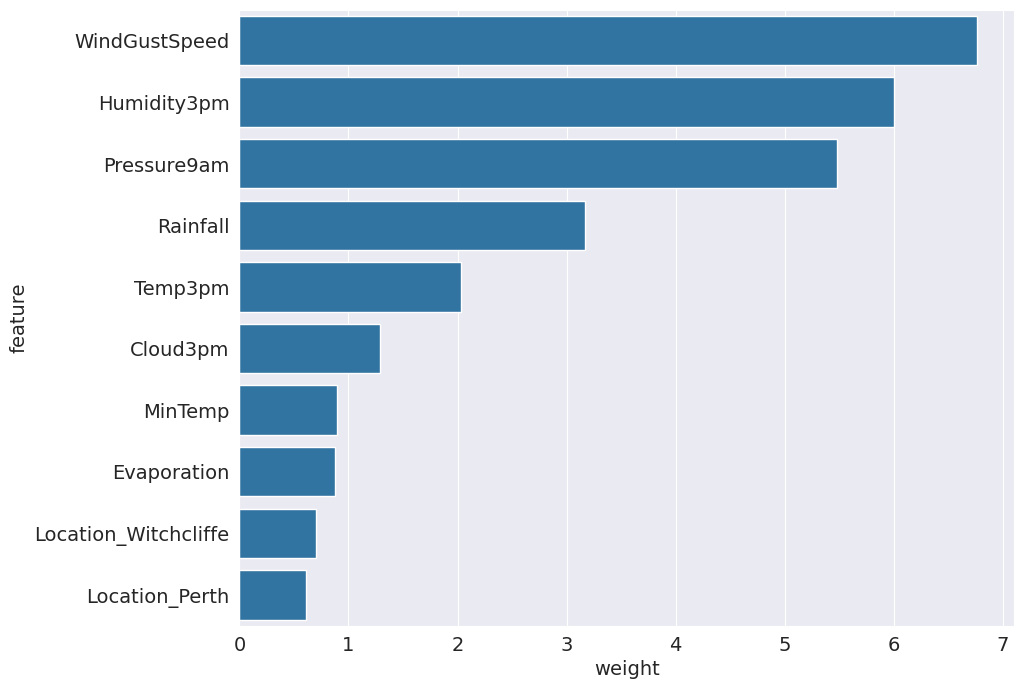

In [93]:
plt.figure(figsize= (10, 8))
sns.barplot(data=weight_df.sort_values('weight', ascending=False).head(10), x = 'weight', y = 'feature')

In [94]:
x_train = train_inputs[numeric_cols + encoded_cols]
x_val = val_inputs[numeric_cols + encoded_cols]
x_text = test_inputs[numeric_cols + encoded_cols]

In [98]:
train_preds = model.predict(x_train)

In [99]:
train_preds

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [100]:
train_targets

RainTomorrow
0                No
1                No
2                No
3                No
4                No
...             ...
144548           No
144549           No
144550           No
144551           No
144552           No

[97988 rows x 1 columns]

In [102]:
train_probs = model.predict_proba(x_train)
train_probs

array([[0.94410219, 0.05589781],
       [0.94077475, 0.05922525],
       [0.96099519, 0.03900481],
       ...,
       [0.98747291, 0.01252709],
       [0.98331582, 0.01668418],
       [0.87427974, 0.12572026]])

In [104]:
model.classes_

array(['No', 'Yes'], dtype=object)

In [103]:
from sklearn.metrics import accuracy_score

score = accuracy_score(train_targets, train_preds)
print('training accuracy: ', score)

training accuracy:  0.8519716700004082


In [105]:
from sklearn.metrics import confusion_matrix

In [107]:
confusion_matrix(train_targets, train_preds, normalize = 'true')

array([[0.94622654, 0.05377346],
       [0.477475  , 0.522525  ]])

In [111]:
def predict_and_plot(input, target, name = ''):
  preds = model.predict(input)

  accuracy = accuracy_score(target, preds)
  print('Accuracy Score: {:.2f}%'.format(accuracy * 100))

  cfm = confusion_matrix(target, preds, normalize = 'true')
  plt.figure()
  sns.heatmap(cfm, annot = True)
  plt.xlabel('prediction')
  plt.ylabel('target')
  plt.title('{} confusion matrix'. format(name));


  return preds





Accuracy Score: 85.20%


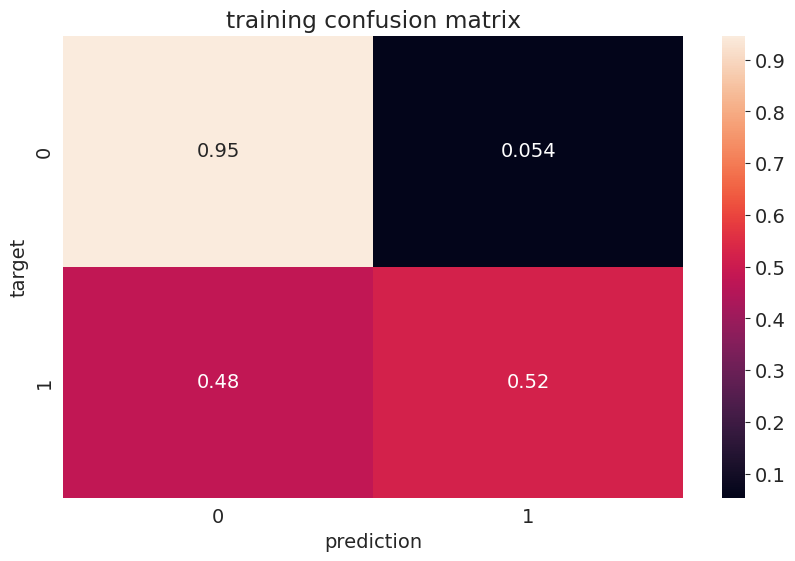

In [112]:
train_preds = predict_and_plot(x_train, train_targets, 'training')